**A Hands on NLP project - Data Cleaning to Model Explainability**

By the end of this notebook you will learn:

- How to deal with text data and clean it. Note that, cleaning process for text data may vary from case to case given the kind of text dataset you have to deal with.

- How to represent text using TF-IDF. You will learn more about TF-IDF in the relevant section of this notebook.

- How to train on the text-data sets and compare different Machine Learning models.

- How to interpret the predictions of Machine Learning model.


We will not focus just on pressing 'run' button and train the model but also go beyond to understand ***why(s)*** behind it.

**Installing relevant libraries**

Note that if you are running it in VS code then you will have to install 'ipykernel' if its not installed

Paste the following command in vs code terminal:

pip install ipykernel

In [18]:
try:
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install scikit-learn
    !pip install seaborn
    !pip install nltk
    !pip install kagglehub

except Exception as error:

    print(f"Error: {error}")


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl (8.6 MB)
Using cached scipy-1.16.2-cp313-cp313-macosx_14_0_arm64.whl (20.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is availabl

***Import relevant libraries***

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import re
import shutil


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# nltk is used to get the stopwords of multiple languages (including English). This will be used to clean the textual data.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amitkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Importing Dataset**

There are 2 ways you can get the IMDb dataset:

1. Go to https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews, and on the top-right of the web-page you will find a download as zip option. After downloading the data, make a directory named 'imdb_dataset' and paste the .csv file in the directory.

2. The other way is to utilise ***kagglehub*** library and execute the script in the below cell to download the dataset in current folder


In [25]:

# Download latest dataset version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

"""
Create a directory named "imdb_dataset" in current directory. It will act as destination directory to copy the downloaded
dataset.
"""
data_path = os.path.join(os.getcwd(), "imdb_dataset")

# Move the downloaded dataset to current directory
shutil.move(path, data_path)

print("The dataset folder is moved to imdb_dataset directory successfully")

100%|██████████| 25.7M/25.7M [00:03<00:00, 7.93MB/s]

Extracting files...


Path to dataset files: /Users/amitkumar/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1
The dataset folder is moved to current directory successfully


**Importing the Dataset**

We will import the data set in pandas dataframe with the help of pandas library. And do some exploration to understand the data in detail.

In [27]:
# Read the dataset using pandas and store as dataframe

df = pd.read_csv("imdb_dataset/IMDB Dataset.csv")

# print the top 5 rows of the dataframe

df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


The printed 5 rows show 3 columns:
1. Index starting from 0
2. Review column having public reviews: This will act as input to the ML model
3. Sentiment column to understand if the review was positive or negative: This will be output variable to be predicted by ML model

Visualisation to understand the distribution of positive and negative sentiments.

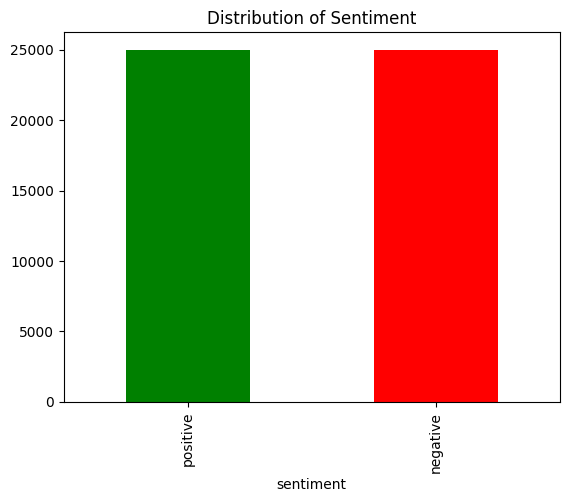

In [28]:
df['sentiment'].value_counts().plot(kind = 'bar', color = ['green', 'red'])
plt.title("Distribution of Sentiment")
plt.show()

In the above plot, we can visualy or qualitatively see that positive and negative sentiment reviews are more or less equal. However,let's dig deeper to calculate exact percentage of positive and negative review distribution. It might not be that beneficial in this case as there is little to no difference between  them but for datasets where there is noticeable difference - its always a good idea to know how skewed our dataset is.

/var/folders/7v/4q618mqj6fv3qg6g31ht7ddm0000gn/T/ipykernel_65133/1398813322.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent = sentiment_percent[i]


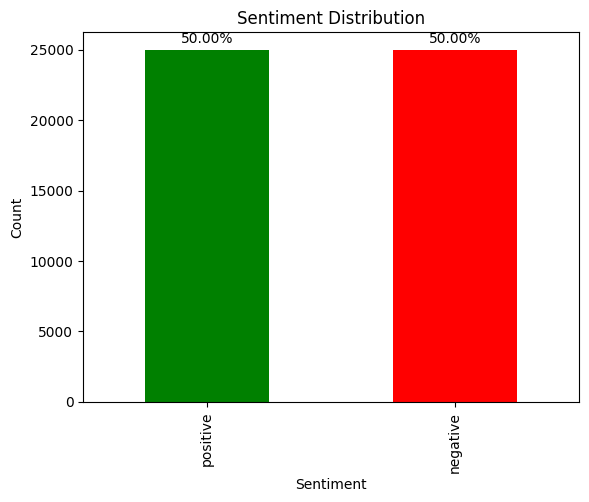

Sentiment Percentage Distribution:
sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


In [29]:
# Get counts and percentages
sentiment_counts = df['sentiment'].value_counts()
sentiment_percent = df['sentiment'].value_counts(normalize=True) * 100

# Plot bar chart
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Annotate percentages on bars
for i, count in enumerate(sentiment_counts):
    percent = sentiment_percent[i]
    plt.text(i, count + 500, f'{percent:.2f}%', ha='center', fontsize=10)

plt.show()

# Print summary
print("Sentiment Percentage Distribution:")
print(sentiment_percent.round(2))


In the above plot and sentiment_percent dataframe we can confirm quantitatively that we have equal number of positive and negative sentiment dataset.

**Cleaning and Processing Text**

Once we have understood the dataset, its characteristics, spread, etc then we jump onto cleaning and pre-processing it. Pre-processing the dataset will make it compatible with the model, and ensure standardization among different variants of input text.

***clean_text*** function is defined through which the reviews column of the dataframe will pass and get processed.

In [31]:
stop_words = stopwords.words("english")     # Import the stop words from english

def clean_text(text: str) -> str:

    text = re.sub("<.*?>","", text)         # This will remove any html formatting from the text.
    text = re.sub("[^a-zA-Z]"," ", text)    # This will remove any non-alphabetical characters.
    text = text.lower()                     # Convert all letters to lower-case alphabets

    text = " ".join([word for word in text.split() if word not in stop_words]) 
    
    # It creates a list of words from the sentence which are not an english stop words. Later, joins the words with spaces
    # between them to create a clean string.

    return text


df["clean_reviews"] = df['review'].apply(clean_text)

In [32]:
#check the first 5 rows of df dataframe

df.head()

,review,sentiment,clean_reviews
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


**Splitting the data for training ML model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_reviews'], df['sentiment'], # clean reviews act as input (x) and sentiment as output (y)
    test_size = 0.2,                      # 20% of the data will be used to test and 80% to train the model
    random_state = 30                     # This shuffles the rows for X and y
)



print(f"Shape of X_train: {X_train.shape()}")
print(f"Shape of X_test: {X_test.shape()}")

print(f"Shape of y_train: {y_train.shape()}")
print(f"Shape of y_test: {y_test.shape()}")



TypeError: got an unexpected keyword argument 'test_split'

In [34]:
X_train.shape

NameError: name 'X_train' is not defined